##1. Batches - mat to pkl

In [1]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# prompt: connect with drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls drive/MyDrive/Rabeya/

2017-05-12_batchdata_updated_struct_errorcorrect-002.mat  batch2-004.pkl
2017-06-30_batchdata_updated_struct_errorcorrect.mat	  batch2.pkl
2018-04-12_batchdata_updated_struct_errorcorrect-001.mat  batch3.pkl
batch1.pkl


In [4]:
matFilename = 'drive/MyDrive/Rabeya/2017-06-30_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

In [5]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [6]:
batch = f['batch']

In [7]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [8]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]][()] # Use indexing or asarray() to access the data
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode() # Use indexing or asarray() to access the data
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()])) # Use indexing or asarray() to access the data
        Qc = np.hstack((f[cycles['Qc'][j,0]][()])) # Use indexing or asarray() to access the data
        Qd = np.hstack((f[cycles['Qd'][j,0]][()])) # Use indexing or asarray() to access the data
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()])) # Use indexing or asarray() to access the data
        T = np.hstack((f[cycles['T'][j,0]][()])) # Use indexing or asarray() to access the data
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()])) # Use indexing or asarray() to access the data
        V = np.hstack((f[cycles['V'][j,0]][()])) # Use indexing or asarray() to access the data
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()])) # Use indexing or asarray() to access the data
        t = np.hstack((f[cycles['t'][j,0]][()])) # Use indexing or asarray() to access the data
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd

    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b1c' + str(i)
    bat_dict[key]=   cell_dict

In [9]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9', 'b1c10', 'b1c11', 'b1c12', 'b1c13', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c22', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b1c46', 'b1c47'])

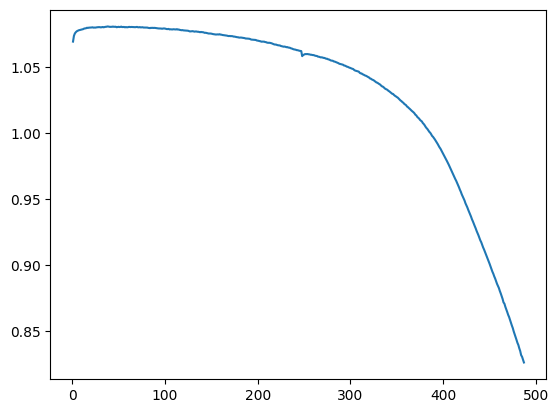

In [10]:
plt.plot(bat_dict['b1c43']['summary']['cycle'], bat_dict['b1c43']['summary']['QD'])

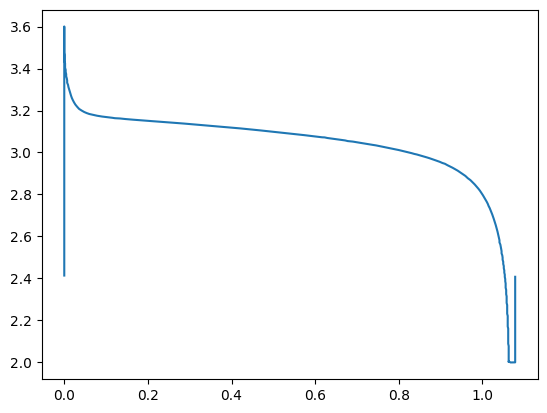

In [11]:
plt.plot(bat_dict['b1c43']['cycles']['10']['Qd'], bat_dict['b1c43']['cycles']['10']['V'])

In [13]:
with open('drive/MyDrive/Rabeya/batch2.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)

In [15]:
# prompt: copy the batch1.pkl file to the diectory in drive where oirignal data was

!cp batch1.pkl drive/MyDrive/Rabeya


cp: cannot stat 'batch1.pkl': No such file or directory


##2. PKL to CSVs

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [17]:
batch1 = pickle.load(open(r'drive/MyDrive/Rabeya/batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [18]:
!ls /content/drive/MyDrive/Rabeya

2017-05-12_batchdata_updated_struct_errorcorrect-002.mat  batch2-004.pkl
2017-06-30_batchdata_updated_struct_errorcorrect.mat	  batch2.pkl
2018-04-12_batchdata_updated_struct_errorcorrect-001.mat  batch3.pkl
batch1.pkl


In [19]:
numBat1 = len(batch1.keys())
numBat1

41

In [20]:
batch2 = pickle.load(open(r'drive/MyDrive/Rabeya/batch2.pkl','rb'))

In [21]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [24]:
for bk, b2k in zip(batch1_keys, batch2_keys):
    # Only process keys that exist in batch2
    if b2k in batch2:
        batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[batch1_keys.index(bk)]
        for j in batch1[bk]['summary'].keys():
            if j == 'cycle':
                batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[b2k]['summary'][j] + len(batch1[bk]['summary'][j])))
            else:
                batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[b2k]['summary'][j]))
        last_cycle = len(batch1[bk]['cycles'].keys())
        for j, jk in enumerate(batch2[b2k]['cycles'].keys()):
            batch1[bk]['cycles'][str(last_cycle + j)] = batch2[b2k]['cycles'][jk]

In [29]:
#del batch2['b2c7']
#del batch2['b2c8']
#del batch2['b2c9']
#del batch2['b2c15']
#del batch2['b2c16']

In [30]:
numBat2 = len(batch2.keys())
numBat2

48

In [ ]:
batch3 = pickle.load(open(r'drive/MyDrive/Rabeya/batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [ ]:
numBat3 = len(batch3.keys())
numBat3

40

In [ ]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [ ]:
bat_dict = {**batch1, **batch2, **batch3}


Text(0, 0.5, 'Discharge Capacity (Ah)')

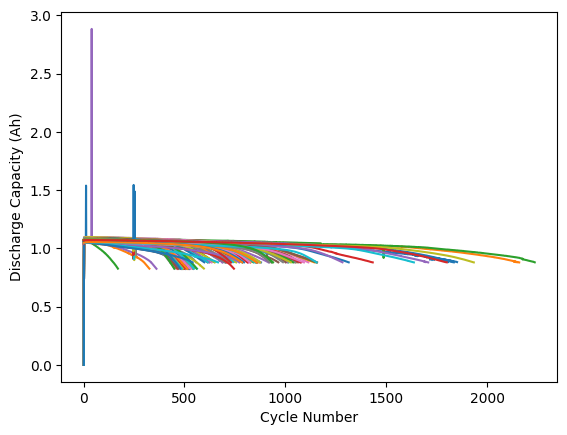

In [ ]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

In [ ]:
# prompt: check the size of bat_dict

print(len(bat_dict))


124


In [ ]:
print(bat_dict['b1c0']['summary'].keys())

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])


In [ ]:
print(bat_dict['b1c0']['cycles'])

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore

out_dir = "./drive/MyDrive/Batteries/more_data/total/"
os.makedirs(out_dir, exist_ok=True)

In [ ]:
# 2) Define which summary fields map to your model’s sensors
#    and what to call them in the CSV
column_map = {
    "cycle":      "cycle_index",
    "QC":         "charge_capacity",
    "QD":         "discharge_capacity",
    "IR":         "internal_resistance",
    "Tavg":       "temperature_mean",
    "Tmin":       "temperature_min",
    "Tmax":       "temperature_max",
}
sensor_cols = [
    "charge_capacity",
    "discharge_capacity",
    "internal_resistance",
    "temperature_mean",
    "temperature_min",
    "temperature_max"
]


In [ ]:
for batch_name, batch in bat_dict.items():
    # a) Load the cycle summaries
    df = pd.DataFrame(batch["summary"]).rename(columns=column_map)

    # b) Drop the first 3 cycles
    df = df[df["cycle_index"] >= 3].reset_index(drop=True)

    # c) Outlier removal (z-score) + forward-fill
    df[sensor_cols] = (
        df[sensor_cols]
        .apply(lambda col: col.where(abs(zscore(col, nan_policy="omit")) < 3))
        .ffill()
    )

    # d) (Optional) If you still want a “time” index, use cycle_index
    #    Otherwise you can drop cycle_index and just save the features.
    #    Here we keep cycle_index as the first column.
    df = df[["cycle_index"] + sensor_cols]

    # e) Save directly—one row per cycle
    out_path = os.path.join(out_dir, f"{batch_name}_for_model.csv")
    df.to_csv(out_path, index=False)

print("✅ Finished! Each CSV now has one row per cycle (no hourly resampling).")

✅ Finished! Each CSV now has one row per cycle (no hourly resampling).


In [ ]:
'''for batch_name, batch in bat_dict.items():
    # 3a) Pull out summary dict and turn into a DataFrame
    df = pd.DataFrame(batch["summary"]).rename(columns=column_map)

    # 3b) Drop the first 3 cycles (startup anomalies)
    df = df[df["cycle_index"] >= 3].reset_index(drop=True)

    # 3c) Outlier removal on each sensor → set extreme z-scores to NaN
    df[sensor_cols] = df[sensor_cols].apply(
        lambda col: col.where(abs(zscore(col, nan_policy="omit")) < 3)
    )

    # 3d) Forward-fill any NaNs created by outlier removal
    df[sensor_cols] = df[sensor_cols].ffill()

    # 4) Build a cumulative time axis in hours
    #    (assumes `chargetime_sec` is in seconds per cycle)
    df["time_hr"] = df["chargetime_sec"].cumsum() / 3600.0

    # 5) Resample to exactly 1-hour bins by nearest-neighbor on time_hr
    max_hr = int(np.floor(df["time_hr"].max()))
    records = []
    for hr in range(0, max_hr + 1):
        # find the cycle whose time_hr is closest to this integer hour
        idx = (df["time_hr"] - hr).abs().idxmin()
        rec = {c: df.at[idx, c] for c in sensor_cols}
        rec["time_hr"] = hr
        records.append(rec)

    df_hourly = pd.DataFrame(records)

    # 6) Save to CSV
    out_path = os.path.join("./drive/MyDrive/Batteries/more_data/", f"{batch_name}_for_model.csv")
    df_hourly.to_csv(out_path, index=False)

print("✅ Finished! Look in ./processed_batches for your model-ready CSVs.")'''

✅ Finished! Look in ./processed_batches for your model-ready CSVs.


In [ ]:
!ls drive

MyDrive


##2. Dataset assembly & split

In [ ]:
# 1) Mount your Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install --quiet transformers datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==1

In [ ]:
import os, glob, pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer


In [ ]:
# 4) Path to your CSVs in Drive
data_dir = '/content/drive/MyDrive/Batteries/more_data/csvs'
file_paths = glob.glob(os.path.join(data_dir, '*_for_model.csv'))
assert file_paths, f"No CSVs found in {data_dir}"

# 5) Load into one DataFrame
data_list = []
for fp in file_paths:
    batch = os.path.basename(fp).replace('_for_model.csv','')
    df = pd.read_csv(fp)
    df['batch'] = batch
    data_list.append(df)
data = pd.concat(data_list, ignore_index=True)
print(f"Loaded {data['batch'].nunique()} batches, {len(data)} total rows.")


Loaded 124 batches, 368 total rows.


In [ ]:
data

,charge_capacity,discharge_capacity,internal_resistance,temperature_mean,temperature_min,temperature_max,time_hr,batch
0,1.071674,1.071900,0.016724,31.931490,29.604385,35.692978,0,b1c0
1,1.070485,1.070841,0.016797,31.519272,29.150728,35.738716,1,b1c0
2,1.058479,1.057613,0.016890,31.699459,29.104429,36.196724,2,b1c0
3,1.029014,1.047706,0.016983,31.617423,29.010437,36.291855,3,b1c0
4,1.035002,1.035250,0.017090,31.917243,29.328474,36.493942,4,b1c0
...,...,...,...,...,...,...,...,...
363,1.064547,1.064757,0.015591,33.668792,31.674583,35.818840,1,b3c45
364,1.053097,1.053288,0.015577,34.333867,32.311345,36.550878,2,b3c45
365,1.037845,1.037950,0.015806,33.162420,31.075992,35.422564,3,b3c45
366,1.015944,1.015952,0.015549,34.353286,32.410871,36.390923,4,b3c45


In [ ]:
# 6) Split batches into train/val/test
batches = data['batch'].unique().tolist()
train_batches, temp = train_test_split(batches, train_size=90, random_state=42)
val_batches, test_batches = train_test_split(temp, train_size=20, test_size=len(batches)-90-20, random_state=42)

# 7) Flatten each batch’s series for the model
sensor_cols = [
    'charge_capacity',
    'discharge_capacity',
    'internal_resistance',
    'temperature_mean',
    'temperature_min',
    'temperature_max'
]

def build_examples(batch_list):
    examples = []
    for b in batch_list:
        dfb = data[data['batch']==b].sort_values('time_hr')
        seq  = dfb[sensor_cols].values.tolist()
        flat = [v for step in seq for v in step]
        examples.append({'series': flat})
    return examples



In [ ]:
train_exs = build_examples(train_batches)
val_exs   = build_examples(val_batches)
test_exs  = build_examples(test_batches)

In [ ]:
len(test_exs)

14

##3. LLama Timeeee

In [ ]:
!git clone -b update-gluonts https://github.com/time-series-foundation-models/lag-llama/

Cloning into 'lag-llama'...
remote: Enumerating objects: 505, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 505 (delta 154), reused 109 (delta 109), pack-reused 312 (from 3)
Receiving objects: 100% (505/505), 283.34 KiB | 16.67 MiB/s, done.
Resolving deltas: 100% (252/252), done.


In [ ]:
cd /content/lag-llama

/content/lag-llama


In [ ]:
!pip install -r requirements.txt  # this could take some time # ignore the errors displayed by colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -U torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201

In [ ]:
cd /content/lag-llama

/content/lag-llama


In [ ]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir /content/lag-llama

lag-llama.ckpt: 100% 29.5M/29.5M [00:00<00:00, 230MB/s]
Download complete. Moving file to /content/lag-llama/lag-llama.ckpt
/content/lag-llama/lag-llama.ckpt


In [ ]:
from itertools import islice

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import torch
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from gluonts.dataset.pandas import PandasDataset
import pandas as pd
import numpy as np

from lag_llama.gluon.estimator import LagLlamaEstimator

In [ ]:
import os, glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''# 2) Build a dict of per-series DataFrames
data_dir = '/content/drive/MyDrive/Batteries/more_data/total/'  # adjust if needed
print(f"Checking for CSVs in: {data_dir}")  # Print the directory being checked

files = glob.glob(os.path.join(data_dir, '*_for_model.csv'))
print(f"Found {len(files)} CSV files.")  # Print the number of files found

dfs_dict = {}
for fp in files:
    series_id = os.path.basename(fp).replace('_for_model.csv','')
    df = pd.read_csv(fp)
    # turn `time_hr` (0,1,2,…) into a real datetime index
    df['timestamp'] = pd.to_datetime(df['time_hr'], unit='h', origin=pd.Timestamp("2020-01-01"))
    df = df.set_index('timestamp').drop(columns=['time_hr'])
    # ensure float32 for all feature columns
    for c in df.columns:
        df[c] = df[c].astype('float32')
    dfs_dict[series_id] = df

# 3) Create a GluonTS PandasDataset for multivariate forecasting
#    We pass the list of all columns as our “target” dimensions.
feature_cols = list(next(iter(dfs_dict.values())).columns)
dataset = PandasDataset(dfs_dict, target=feature_cols)'''

Checking for CSVs in: /content/drive/MyDrive/Batteries/more_data/total/
Found 124 CSV files.


KeyError: 'time_hr'

In [ ]:
import os, glob
import pandas as pd
from gluonts.dataset.pandas import PandasDataset

# 2) Build a dict of per‐series DataFrames (one row per cycle)
data_dir = '/content/drive/MyDrive/Batteries/more_data/total/'  # adjust path as needed
print(f"Checking for CSVs in: {data_dir}")

files = glob.glob(os.path.join(data_dir, '*_for_model.csv'))
print(f"Found {len(files)} CSV files.")

dfs_dict = {}
for fp in files:
    series_id = os.path.basename(fp).replace('_for_model.csv','')
    df = pd.read_csv(fp)

    # Use cycle_index as the time axis: one “day” per cycle
    df['timestamp'] = pd.to_datetime(
        df['cycle_index'],
        unit='D',
        origin=pd.Timestamp("2000-01-01")
    )
    df = df.set_index('timestamp')

    # Drop the now-unneeded cycle_index column
    df = df.drop(columns=['cycle_index'])

    # Make sure all feature columns are float32
    df = df.astype('float32')

    dfs_dict[series_id] = df

#print(dfs_dict)

# 3) Create a GluonTS PandasDataset
#feature_cols = list(next(iter(dfs_dict.values())).columns)
dataset = PandasDataset(
    dfs_dict               # one time step per “day” (i.e. per cycle)
)

#print(dataset)


Checking for CSVs in: /content/drive/MyDrive/Batteries/more_data/total/
Found 124 CSV files.


In [ ]:
dataset

PandasDataset<size=124, freq=D, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [ ]:
import sys
from types import ModuleType

# Create dummy module hierarchy
def create_dummy_module(module_path):
    """
    Create a dummy module hierarchy for the given path.
    Returns the leaf module.
    """
    parts = module_path.split('.')
    current = ''
    parent = None

    for part in parts:
        current = current + '.' + part if current else part
        if current not in sys.modules:
            module = ModuleType(current)
            sys.modules[current] = module
            if parent:
                setattr(sys.modules[parent], part, module)
        parent = current

    return sys.modules[module_path]

# Create the dummy gluonts module hierarchy
gluonts_module = create_dummy_module('gluonts.torch.modules.loss')

# Create dummy classes for the specific loss functions
class DistributionLoss:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

class NegativeLogLikelihood:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

# Add the specific classes to the module
gluonts_module.DistributionLoss = DistributionLoss
gluonts_module.NegativeLogLikelihood = NegativeLogLikelihood

In [ ]:
def get_lag_llama_predictions(dataset, prediction_length, device, context_length=32, use_rope_scaling=False, num_samples=100):
    ckpt = torch.load("/content/lag-llama/lag-llama.ckpt", map_location=device, weights_only=False) # Uses GPU since in this Colab we use a GPU.
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
    }

    estimator = LagLlamaEstimator(
        ckpt_path="/content/lag-llama/lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length, # Lag-Llama was trained with a context length of 32, but can work with any context length

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,
        num_parallel_samples=num_samples,
        device=device,
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)

    return forecasts, tss